# import data

In [1]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
#from xgboost import XGBClassifier
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

# load and explore data

In [2]:
df=pd.read_csv('hr_employee_churn_data.csv')

In [4]:
df.head(5)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
df=df.drop(['empid'],axis='columns')

In [6]:
df.shape

(14999, 9)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440123,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='Work_accident'>

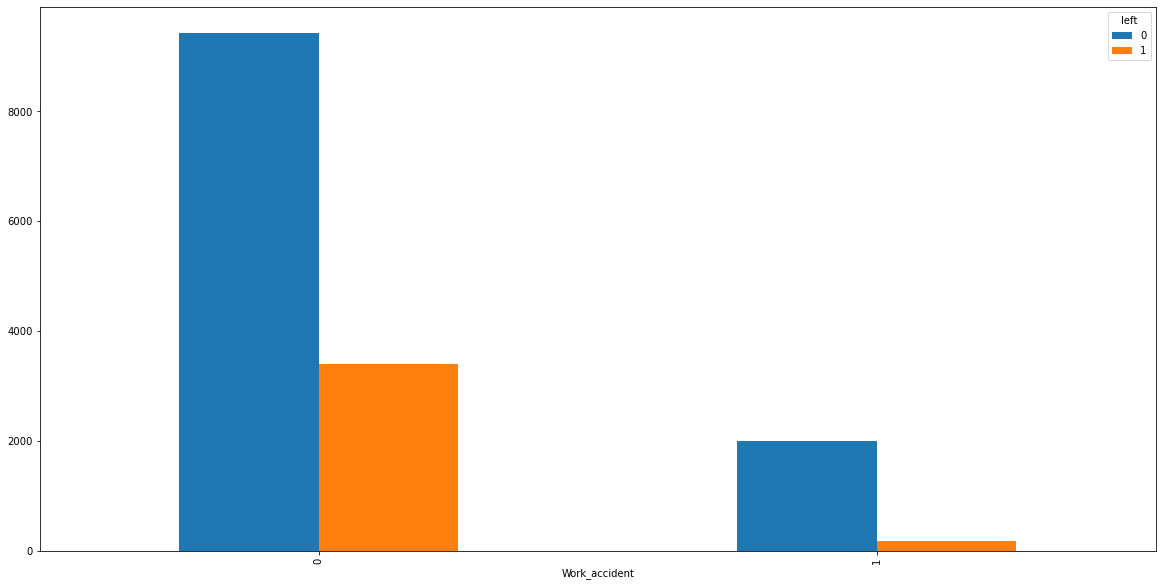

In [10]:
pd.crosstab(df['Work_accident'], df['left']).plot(kind='bar')

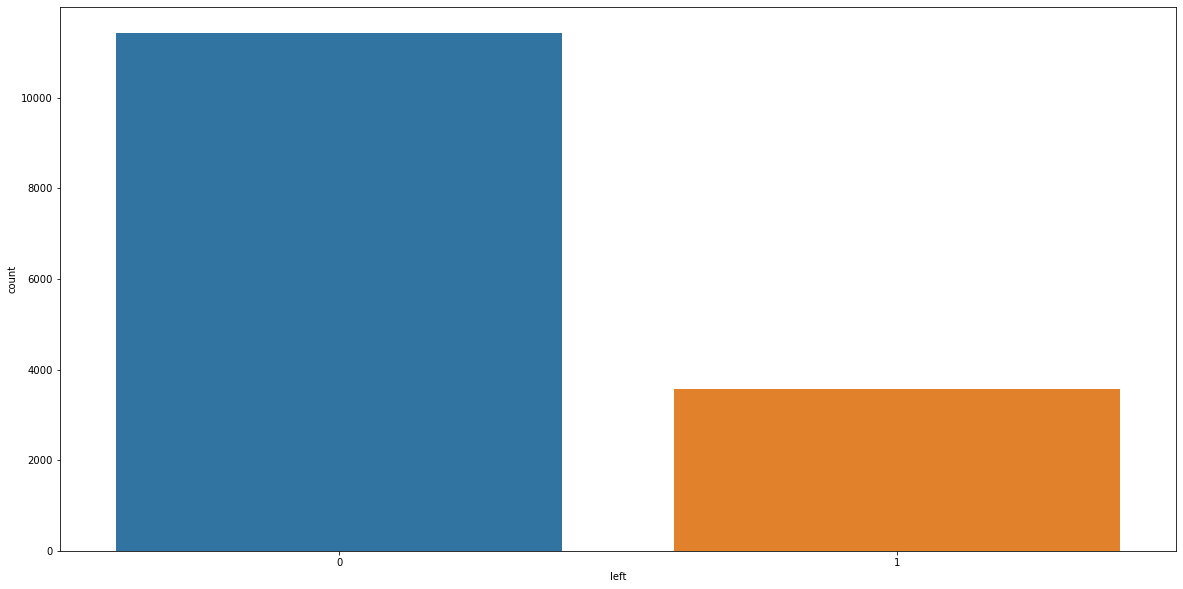

In [11]:
#count left
sns.countplot(x='left',data=df)
plt.show()

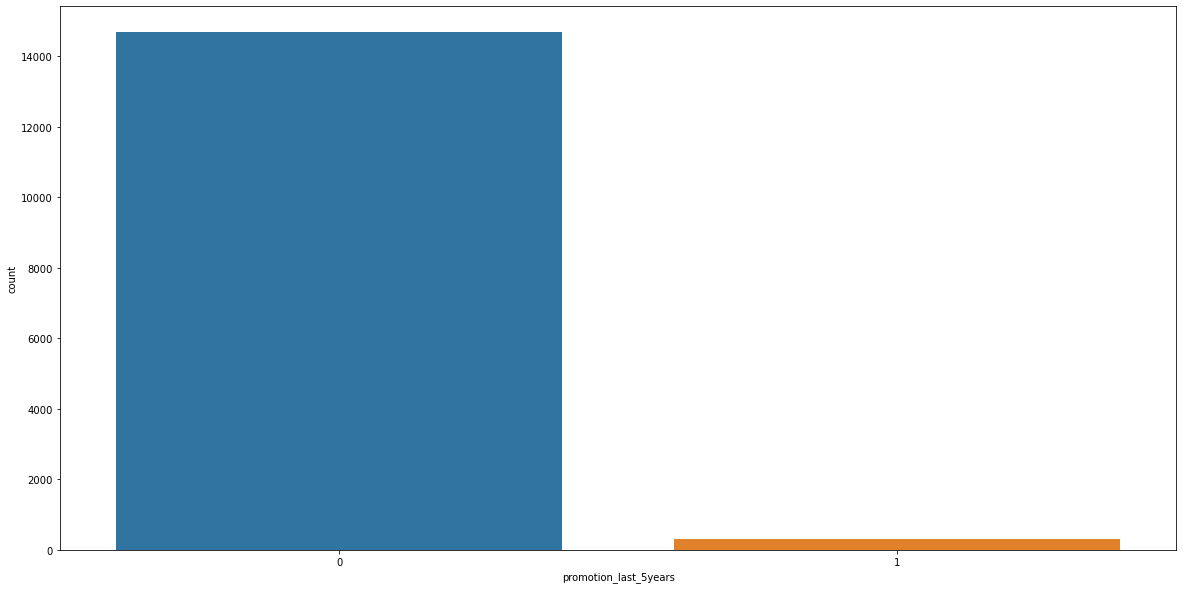

In [12]:
sns.countplot(x='promotion_last_5years',data=df)
plt.show()

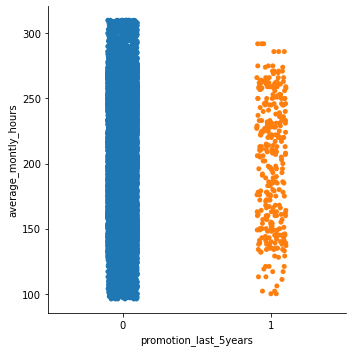

In [13]:
sns.catplot(x='promotion_last_5years',y='average_montly_hours',data=df)
plt.show()

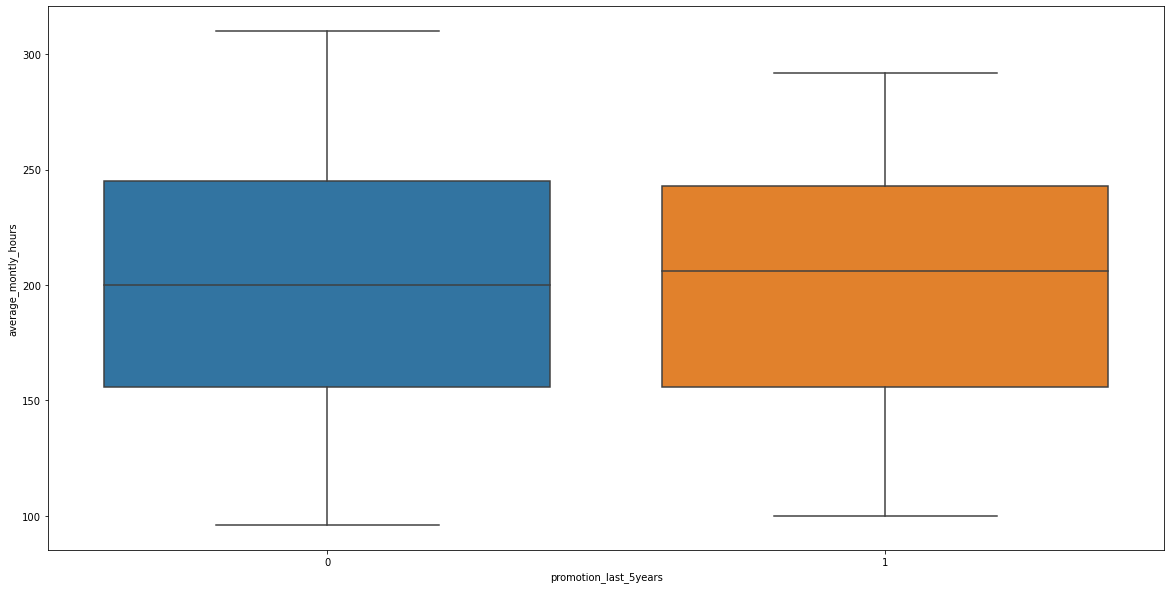

In [14]:
sns.boxplot(x='promotion_last_5years',y='average_montly_hours',data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

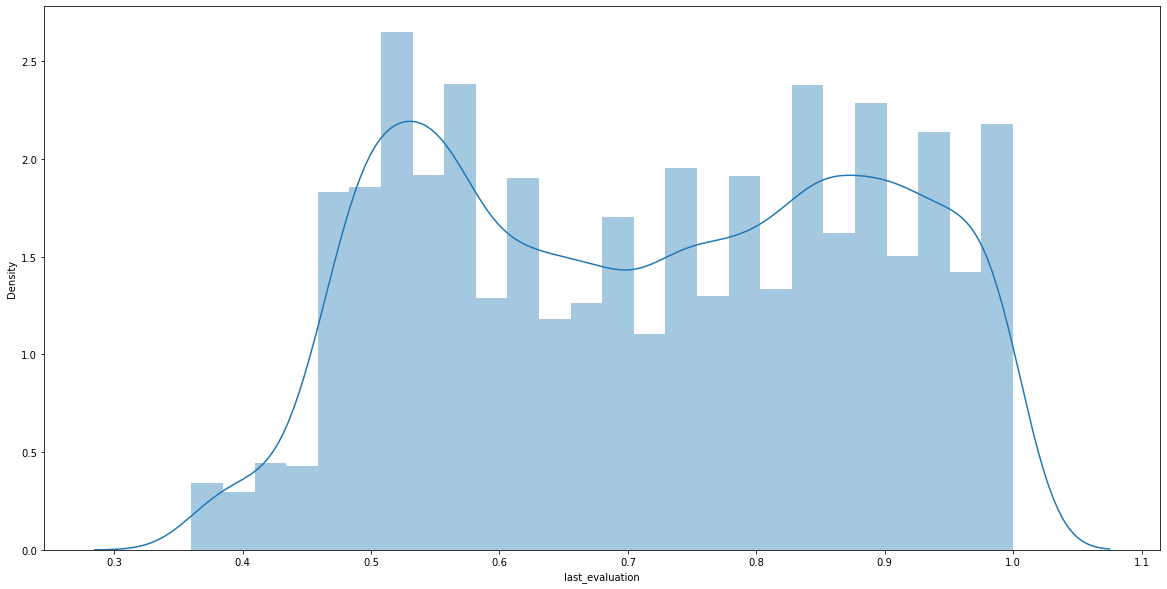

In [15]:
#sA distplot plots a univariate distribution of observations
sns.distplot(df['last_evaluation'])


<AxesSubplot:>

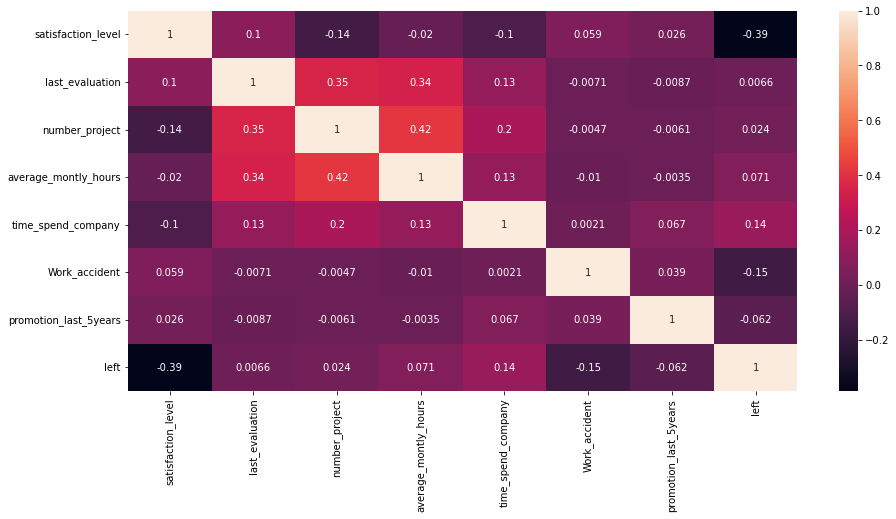

In [16]:

## Checking for correlation
correl=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(correl,annot=True)

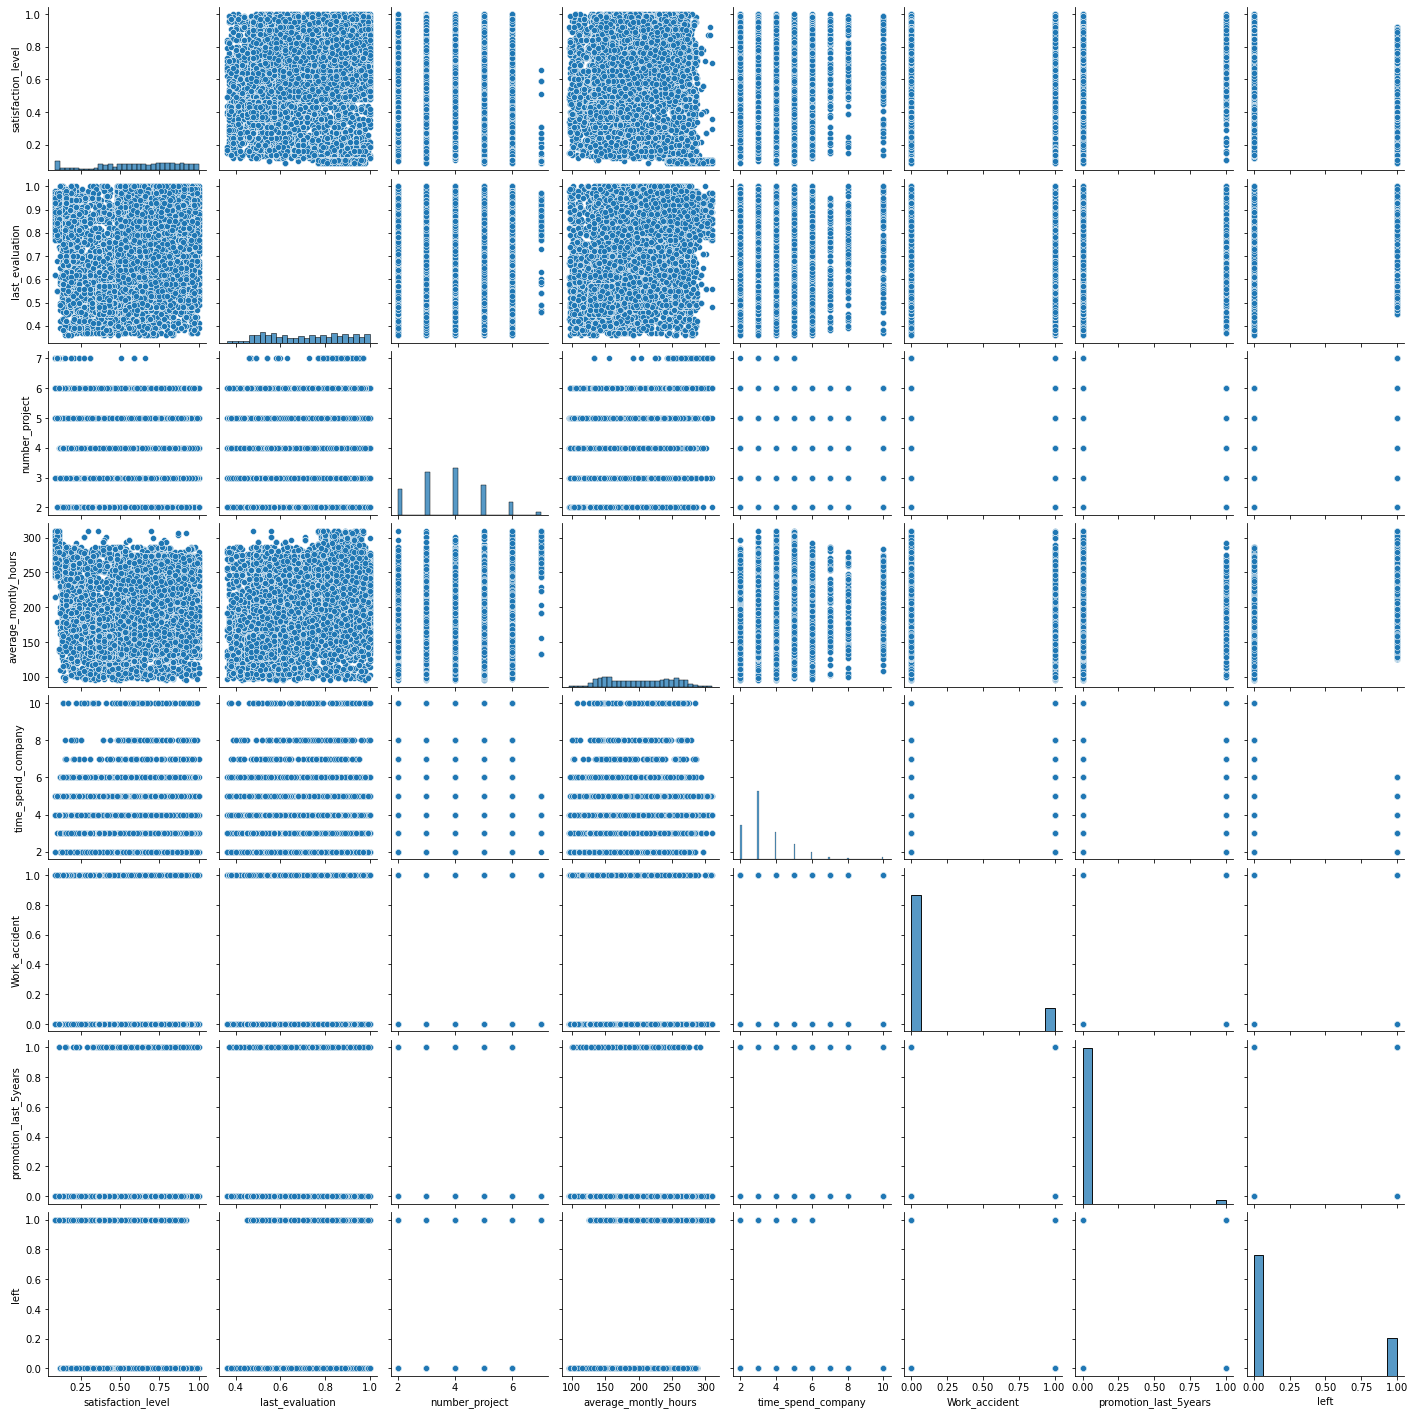

In [17]:
## Checking for pairplot
sns.pairplot(df)

# Data processing

In [18]:
df.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [19]:
df.satisfaction_level.count()

14997

In [20]:
df=df.dropna()

In [21]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [22]:
df.shape

(14997, 9)

In [23]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low,1
14995,0.37,0.48,2,160,3,0,0,low,1
14996,0.37,0.53,2,143,3,0,0,low,1
14997,0.11,0.96,6,280,4,0,0,low,1


In [24]:
df.duplicated().sum()

3038

In [25]:
#df=df.drop_duplicates()

In [26]:
df.average_montly_hours.sort_values( ascending=True)


8605      96
7492      96
10020     96
2678      96
9221      96
        ... 
803      310
14975    310
566      310
1596     310
1936     310
Name: average_montly_hours, Length: 14997, dtype: int64

In [27]:
df['average_montly_hours'].std()

49.94263818765856

In [28]:
#outliers
upperlimit =df['average_montly_hours'].mean()+df['average_montly_hours'].std()
lowerlimit =df['average_montly_hours'].mean()-df['average_montly_hours'].std()
df=df[(df['average_montly_hours']>lowerlimit)&(df['average_montly_hours']<upperlimit)]

In [29]:
df.shape

(8694, 9)

In [30]:
df.last_evaluation.sort_values( ascending=True)

13330    0.36
13379    0.36
11500    0.36
11119    0.36
11168    0.36
         ... 
494      1.00
7237     1.00
5498     1.00
828      1.00
943      1.00
Name: last_evaluation, Length: 8694, dtype: float64

In [31]:
min_thresold, max_thresold = df.last_evaluation.quantile([0.001, 0.999])

In [32]:
df=df[(df.last_evaluation>min_thresold)&(df.last_evaluation<max_thresold)]

In [33]:
df.shape

(8504, 9)

In [34]:
#dummies
dummies=pd.get_dummies(df.salary)

In [35]:
dummies

,high,low,medium
0,0,1,0
3,0,1,0
4,0,1,0
6,0,1,0
12,0,1,0
...,...,...,...
14989,0,1,0
14990,0,1,0
14992,0,1,0
14995,0,1,0


In [36]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1
6,0.10,0.77,6,247,4,0,0,low,1
12,0.84,0.92,4,234,5,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14989,0.43,0.57,2,159,3,1,0,low,1
14990,0.89,0.88,5,228,5,1,0,low,1
14992,0.40,0.48,2,155,3,0,0,low,1
14995,0.37,0.48,2,160,3,0,0,low,1


In [37]:
df=pd.concat([df,dummies],axis="columns")

In [38]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,0,1,0
3,0.72,0.87,5,223,5,0,0,low,1,0,1,0
4,0.37,0.52,2,159,3,0,0,low,1,0,1,0
6,0.10,0.77,6,247,4,0,0,low,1,0,1,0
12,0.84,0.92,4,234,5,0,0,low,1,0,1,0


In [39]:
df=df.drop(['salary'],axis="columns")

In [40]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,1,0,1,0
3,0.72,0.87,5,223,5,0,0,1,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,1,0
6,0.10,0.77,6,247,4,0,0,1,0,1,0
12,0.84,0.92,4,234,5,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14989,0.43,0.57,2,159,3,1,0,1,0,1,0
14990,0.89,0.88,5,228,5,1,0,1,0,1,0
14992,0.40,0.48,2,155,3,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,1,0


In [41]:
#Model

In [42]:
X=df.drop(['left'],axis='columns')

In [43]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,1,0
3,0.72,0.87,5,223,5,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0
6,0.10,0.77,6,247,4,0,0,0,1,0
12,0.84,0.92,4,234,5,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14989,0.43,0.57,2,159,3,1,0,0,1,0
14990,0.89,0.88,5,228,5,1,0,0,1,0
14992,0.40,0.48,2,155,3,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,1,0


In [44]:
y=df.left

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Find best model using GridSearchCV

In [46]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [54]:
#create param
model_params = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
     'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
    
      }
    

In [55]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,RandomForestClassifier,0.928983,"{'criterion': 'gini', 'max_depth': 3, 'max_fea..."
1,lasso,-0.001207,"{'alpha': 1, 'selection': 'random'}"
2,logistic_regression,0.858554,{'C': 1}


In [46]:
reg=RandomForestClassifier(n_estimators=10)
reg.fit(X_train, y_train,)

RandomForestClassifier(n_estimators=10)

In [47]:
reg.score( X_test,y_test) 

0.9905937683715461

In [49]:
#Compute confusion matrix to evaluate the accuracy of a classification.
y_predicted = reg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1489,    4],
       [  12,  196]], dtype=int64)

Text(69.0, 0.5, 'Truth')

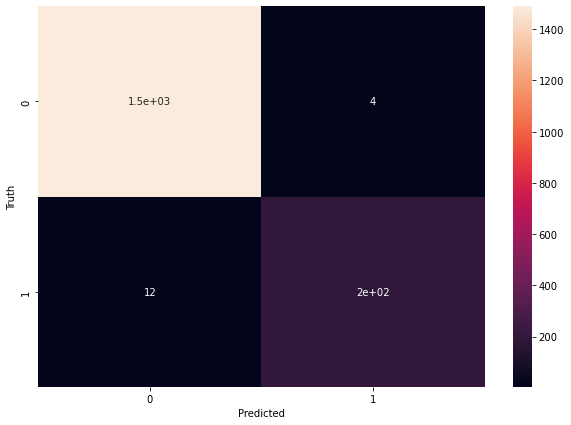

In [50]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1493
           1       0.98      0.94      0.96       208

    accuracy                           0.99      1701
   macro avg       0.99      0.97      0.98      1701
weighted avg       0.99      0.99      0.99      1701

